In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

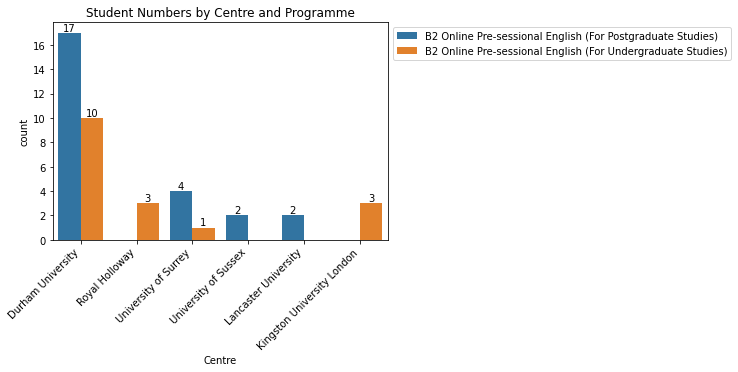

<Figure size 432x288 with 0 Axes>

In [101]:
b2_data = pd.read_excel(r"C:\Users\storr\Documents\1_RHULISC\B2_results.xlsx", sheet_name="Overall")

b2_melt = pd.melt(b2_data, id_vars=["Student Id", "Student Last name", "Student First name", "Course", "Centre", "Current Course Name"], var_name="Assessment", value_name="Grade")

ax = sns.countplot(x="Centre", data=b2_data, hue="Current Course Name")
plt.title("Student Numbers by Centre and Programme")
plt.xticks(rotation=45, ha="right")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(bbox_to_anchor=(1,1))
#plt.tight_layout()
plt.show()
plt.clf()


In [ ]:

sns.barplot(x="Centre", y="Grade", data=b2_melt, hue="Assessment")
plt.title("Average Grades by Coursework and Centre")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


In [ ]:

fig, axs = plt.subplots(1,2, figsize=(12,5))
plt.suptitle("Undergraduate vs Postgraduate Grades by Centre")
sns.barplot(x="Assessment", y="Grade", hue="Centre", data=b2_melt[b2_melt["Current Course Name"] == "B2 Online Pre-sessional English (For Postgraduate Studies)"], dodge=True, ax=axs[0])
axs[0].set_title("Postgraduate Results")
axs[0].legend(ncol=2, fontsize=9)
axs[0].set_yticks([x for x in range(0,110, 10)])
for container in axs[0].containers:
  axs[0].bar_label(container, padding=24)
axs[0].set_xticklabels(labels=b2_melt["Assessment"][b2_melt["Current Course Name"] == "B2 Online Pre-sessional English (For Postgraduate Studies)"].unique(), rotation=50, ha="right")


In [ ]:

sns.barplot(x="Assessment", y="Grade", hue="Centre", data=b2_melt[b2_melt["Current Course Name"] == "B2 Online Pre-sessional English (For Undergraduate Studies)"], dodge=True, ax=axs[1])
axs[1].legend(ncol=2, fontsize=9)
axs[1].set_title("Undergraduate Results")
axs[1].set_yticks([x for x in range(0,110, 10)])
axs[1].set_xticklabels(labels=b2_melt["Assessment"][b2_melt["Current Course Name"] == "B2 Online Pre-sessional English (For Undergraduate Studies)"].unique(), rotation=50, ha="right")
for container in axs[1].containers:
  axs[1].bar_label(container, padding=18)
plt.tight_layout()
plt.show()

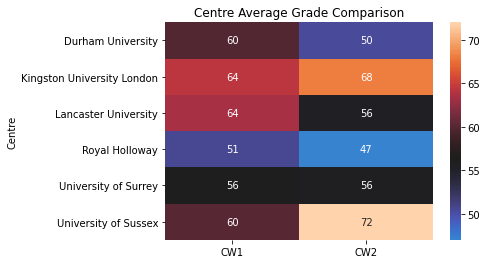

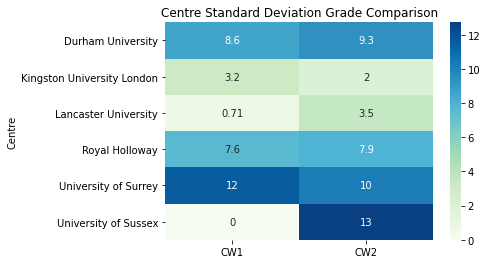

<Figure size 432x288 with 0 Axes>

In [153]:
assessment = b2_data[["Centre", "CW1", "CW2"]]

centre_mean = assessment.groupby(by="Centre").mean()

assessment_mean = np.mean(np.mean(assessment, axis=1))

sns.heatmap(centre_mean, annot=True, center=assessment_mean)
plt.title("Centre Average Grade Comparison")
plt.show()
plt.clf()

assessment_std = np.mean(assessment.std())

centre_std = assessment.groupby(by="Centre").std()

sns.heatmap(centre_std, annot=True, cmap="GnBu")
plt.title("Centre Standard Deviation Grade Comparison")
plt.show()
plt.clf()





